# Preamble

In [2]:
# Preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


base_directory_data_str =  base_directory_str + '/data/figure5_data'
base_directory_figure_str =  base_directory_str + '/figures/figure5'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'

plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

                

Mounted at /content/gdrive
cpu


# Two matrix generation function

In [3]:

# this function generate two random matrices from unit sphere such that distribution of angle between them is uniform(0,180)

def generate_two_matrices_2(size1,size2):

  first_matrix =  torch.randn([size1,size2]).to(torch.float64)

  first_matrix = first_matrix /( torch.mul( first_matrix ,  first_matrix ).sum().sqrt() )

  second_matrix =  torch.randn_like(  first_matrix  )

  second_matrix =  second_matrix  / ( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )


  second_matrix = second_matrix - (  torch.mul( first_matrix ,  second_matrix ).sum() )*first_matrix

  second_matrix =  second_matrix  / ( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )


  r1 = torch.randn([1])
  r2 = torch.randn([1])


  second_matrix = second_matrix*r1 + first_matrix*r2 
  second_matrix =  second_matrix  / ( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )
  


  return first_matrix , second_matrix


# A , C = generate_two_matrices_2(10,25)



# print( my_weight.angle( A , C )  )

In [4]:

# this function generate two random matrices from unit sphere  such that distribution of angle between them is uniform(0,90)
# for ploting figure 5 A,B,C , we just need condiion in wich angle between W^T and B is within 90 degree so this function is more efficient than generate_two_matrices_2
def generate_two_matrices_1(size1,size2):

  first_matrix =  torch.randn([size1,size2]).to(torch.float64)

  first_matrix = first_matrix /( torch.mul( first_matrix ,  first_matrix ).sum().sqrt() )

  second_matrix =  torch.randn_like(  first_matrix  )

  second_matrix =  second_matrix  /( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )


  second_matrix = second_matrix - (  torch.mul( first_matrix ,  second_matrix ).sum() )*first_matrix

  second_matrix =  second_matrix  /( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )


  r1 = torch.randn([1])
  r2 = torch.randn([1])
  r2 = r2.abs()    #######################################################


  second_matrix = second_matrix*r1 + first_matrix*r2 

  second_matrix =  second_matrix  / ( torch.mul(  second_matrix  ,   second_matrix   ).sum().sqrt() )



  return first_matrix , second_matrix


# A , C = generate_two_matrices_1(10,25)



# print( my_weight.angle( A , C )  )

# Run heatmap

In [15]:


N_iter = 500000

size1 = 30
size2 =  15
size3 = 40







steps_abs = 19
heatmap_y_abs = torch.linspace(0,90,steps_abs)
heatmap_tensor_mean_abs = torch.zeros( [steps_abs-1,steps_abs-1] )
heatmap_tensor_var_abs = torch.zeros( [steps_abs-1,steps_abs-1] )

heatmap_tensor_count_abs = torch.zeros( [steps_abs-1,steps_abs-1] )


steps = 37
heatmap_y = torch.linspace(0,180,steps)
heatmap_tensor_mean = torch.zeros( [steps-1,steps-1] )
heatmap_tensor_var = torch.zeros( [steps-1,steps-1] )

heatmap_tensor_count = torch.zeros( [steps-1,steps-1] )



heatmap_y_nonlin = torch.linspace(0,180,steps)
heatmap_tensor_mean_nonlin = torch.zeros( [steps-1,steps-1] )
heatmap_tensor_var_nonlin = torch.zeros( [steps-1,steps-1] )

heatmap_tensor_count_nonlin = torch.zeros( [steps-1,steps-1] )

def derivative_activation1(x):

  return ( x >= 0  ) * 1


for i in range(N_iter):


  A , C = generate_two_matrices_2(size1,size2)


  B , D = generate_two_matrices_2(size2,size3)




  Z1 = derivative_activation1 (torch.randn([size1,size2]))

  Z2 = derivative_activation1( torch.randn([size1,size3]) )






  cos_teta1 =  torch.mul(  A , C ).sum()  / torch.mul(  A , A ).sum() .sqrt()  / torch.mul(  C , C ).sum() .sqrt()
  teta1 =   my_weight.angle( A , C ) 


  cos_teta1_abs =  (torch.mul(  A , C ).sum()  / torch.mul(  A , A ).sum() .sqrt()  / torch.mul(  C , C ).sum() .sqrt()).abs()
  teta1_abs  =  90 -  np.abs(  my_weight.angle( A , C )  -  90   )


  cos_teta2 =  torch.mul(  B , D ).sum()  / torch.mul(  B , B ).sum() .sqrt()  / torch.mul(  D , D ).sum() .sqrt()
  teta2 =   my_weight.angle( B , D ) 


  cos_teta2_abs =  ( torch.mul(  B , D ).sum()  / torch.mul(  B , B ).sum() .sqrt()  / torch.mul(  D , D ).sum() .sqrt() ).abs()
  teta2_abs =   90 - np.abs( my_weight.angle( B , D )  -  90 )

  E = torch.matmul(  A , B  )

  F = torch.matmul(  C , D  )



  E_non_lin = torch.mul(torch.matmul(  torch.mul(A,Z1) , B  ),Z2)

  F_non_lin = torch.mul(torch.matmul(  torch.mul(C,Z1)  , D  ),Z2)



  cos_teta3 =  torch.mul(  E , F ).sum()  / torch.mul(  E , E ).sum() .sqrt()  / torch.mul(  F , F ).sum() .sqrt()
  teta3 =   my_weight.angle( E , F )  
  
  teta3_non_lin =   my_weight.angle( E_non_lin , F_non_lin )  

  cos_teta3_abs =  ( torch.mul(  E , F ).sum()  / torch.mul(  E , E ).sum() .sqrt()  / torch.mul(  F , F ).sum() .sqrt()  ).abs()
  teta3_abs =   90 - np.abs( my_weight.angle( E , F ) -  90  )


  cos_teta1_cos_teta2 = cos_teta1*cos_teta2

  if N_iter==1 : print("cos_teta1*cos_teta2: " + str(cos_teta1_cos_teta2))
  teta1_teta2 = teta1*teta2



  min_teta = torch.min( torch.tensor(  [teta1  , teta2 ]  ))

  min_cos_teta = torch.min( torch.tensor(  [cos_teta1  , cos_teta2 ]  ))

  max_teta = torch.max( torch.tensor(  [teta1  , teta2 ]  ))

  max_cos_teta = torch.max( torch.tensor(   [cos_teta1  , cos_teta2 ]  ))





  min_teta_abs = torch.min( torch.tensor(  [teta1_abs  , teta2_abs ]  ))

  min_cos_teta_abs = torch.min( torch.tensor(  [cos_teta1_abs  , cos_teta2_abs ]  ))

  max_teta_abs = torch.max( torch.tensor(  [teta1_abs  , teta2_abs ]  ))

  max_cos_teta_abs = torch.max( torch.tensor(   [cos_teta1_abs  , cos_teta2_abs ]  ))


  mean_teta = torch.mean( torch.tensor(  [teta1  , teta2 ]  ))

  mean_cos_teta = torch.mean( torch.tensor(  [cos_teta1  , cos_teta2 ]  ))





  for ii in range(len(heatmap_y)-1):
    if (teta1 >=  heatmap_y[ii]  and  teta1 < heatmap_y[ii+1]  ):
      iix = ii
    if (teta2 >=  heatmap_y[ii]  and  teta2 < heatmap_y[ii+1]  ):
      iiy = ii

  heatmap_tensor_mean [iix , iiy ] = heatmap_tensor_mean [iix , iiy ] + teta3
  heatmap_tensor_count [iix , iiy ]   =  heatmap_tensor_count [iix , iiy ]  + 1
  heatmap_tensor_var [iix , iiy ] = heatmap_tensor_var [iix , iiy ] + teta3**2

  heatmap_tensor_mean_nonlin [iix , iiy ] = heatmap_tensor_mean_nonlin [iix , iiy ] + teta3_non_lin
  heatmap_tensor_count_nonlin [iix , iiy ]   =  heatmap_tensor_count_nonlin [iix , iiy ]  + 1
  heatmap_tensor_var_nonlin [iix , iiy ] = heatmap_tensor_var_nonlin [iix , iiy ] + teta3_non_lin**2






str_dir =  base_directory_data_str + "/heatmap_tensor_mean_linear.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_mean  , fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_var_linear.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_var  , fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_count_linear.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_count  , fp)




str_dir =  base_directory_data_str + "/heatmap_tensor_mean_nonlinear.txt.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_mean_nonlin  , fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_var_nonlinear.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_var_nonlin  , fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_count_nonlinear.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( heatmap_tensor_count_nonlin  , fp)



# Plot heatmap

In [6]:
str_dir =  base_directory_data_str + "/heatmap_tensor_mean_linear.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_mean = pickle.load(fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_var_linear.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_var = pickle.load(fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_count_linear.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_count = pickle.load(fp)



z_mean = torch.div( heatmap_tensor_mean ,  heatmap_tensor_count  )  
z = torch.div( heatmap_tensor_var   ,  heatmap_tensor_count  )  - torch.mul( z_mean , z_mean )

##############################################################################################################



str_dir =  base_directory_data_str + "/heatmap_tensor_mean_nonlinear.txt.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_mean_nonlin  = pickle.load(fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_var_nonlinear.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_var_nonlin  = pickle.load(fp)

str_dir =  base_directory_data_str + "/heatmap_tensor_count_nonlinear.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  heatmap_tensor_count_nonlin  = pickle.load(fp)


z_mean_nonlin = torch.div( heatmap_tensor_mean_nonlin  ,  heatmap_tensor_count_nonlin   )  
z_nonlin = torch.div( heatmap_tensor_var_nonlin    ,  heatmap_tensor_count_nonlin   )  - torch.mul( z_mean_nonlin , z_mean_nonlin )




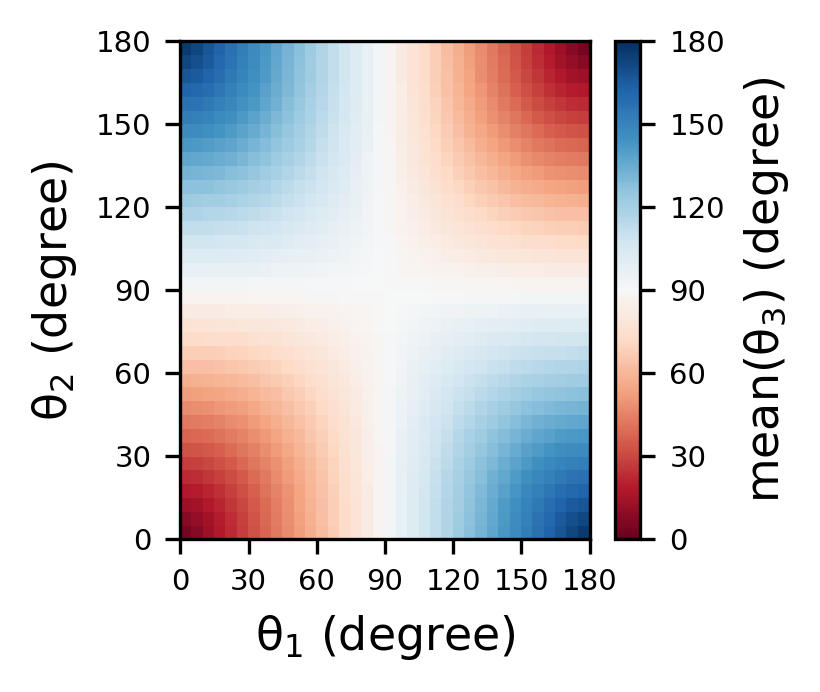

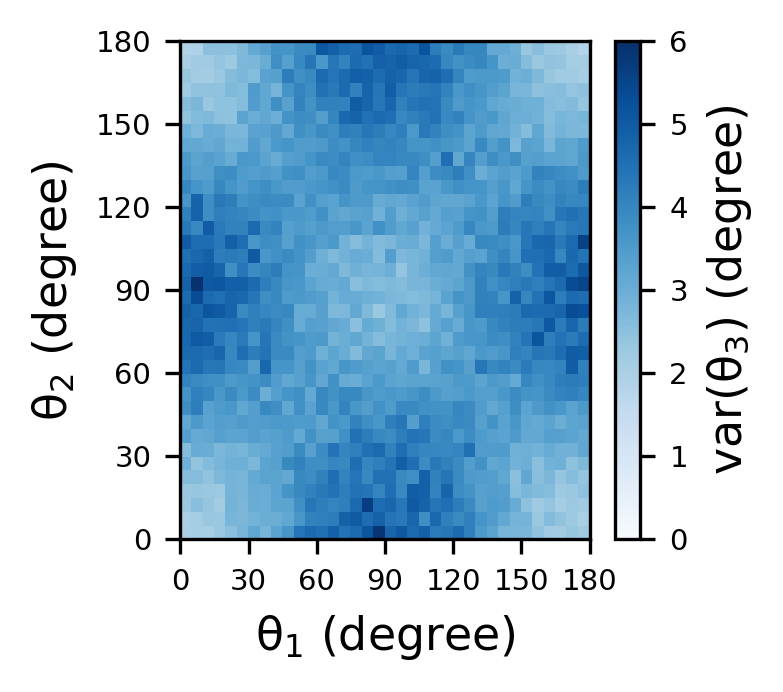

In [18]:


steps = 37
heatmap_y = torch.linspace(0,180,steps)


font_size_22_ = 11

font_size_tick = 7

y, x = np.meshgrid(  heatmap_y  , heatmap_y   )





z = torch.div( heatmap_tensor_mean ,  heatmap_tensor_count  )  


z_min, z_max = 0, 180

fig = plt.figure( num = None, figsize=( 2.2 , 2.2 ), dpi=300, facecolor='w', edgecolor='k'  )

im = plt.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)

plt.axis([0,180 , 0 , 180 ])

plt.xticks(range(0,181,30))

plt.yticks(range(0,181,30))


plt.clim(0,180)

plt.xlabel(r"$\theta_1 \ (degree)$"  , fontsize= font_size_22_  )
plt.ylabel(r"$\theta_2 \ (degree)$"  , fontsize= font_size_22_  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

cbar = fig.colorbar(im  , ax=plt.gca() , ticks=range(0,181,30)  )
cbar.ax.tick_params(labelsize=font_size_tick) 

cbar.set_label( label=r"$mean(\theta_3) \ (degree)$" , size= font_size_22_  )

str_dir = base_directory_figure_str + "/heat_map_mean_uniform_sphere.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()

########################### var ########################

y, x = np.meshgrid(  heatmap_y  , heatmap_y   )




z_mean = torch.div( heatmap_tensor_mean ,  heatmap_tensor_count  )  
z = torch.div( heatmap_tensor_var   ,  heatmap_tensor_count  )  - torch.mul( z_mean , z_mean )


z_min, z_max = z.min() , z .max()

plt.figure( num = None, figsize=( 2.2 , 2.2 ), dpi=300, facecolor='w', edgecolor='k'  )

im = plt.pcolormesh(x, y, z, cmap='Blues', vmin=z_min, vmax=z_max)

plt.axis([0,180 , 0 , 180 ])

plt.xticks(range(0,181,30))

plt.yticks(range(0,181,30))


plt.clim(0, z_max.floor().item() + 1 )

plt.xlabel(r"$\theta_1 \ (degree)$"  , fontsize= font_size_22_  )
plt.ylabel(r"$\theta_2 \ (degree)$"  , fontsize= font_size_22_  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

cbar = fig.colorbar(im  , ax=plt.gca()  )
cbar.ax.tick_params(labelsize=font_size_tick) 

cbar.set_label( label=r"$var(\theta_3) \ (degree)$" , size= font_size_22_  )

str_dir = base_directory_figure_str + "/heat_map_var_uniform_sphere.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()



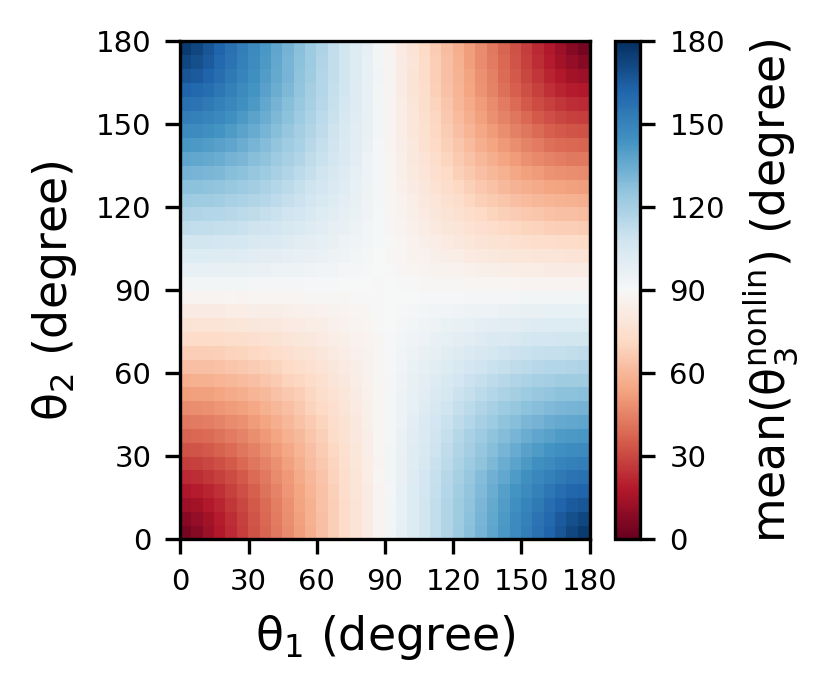

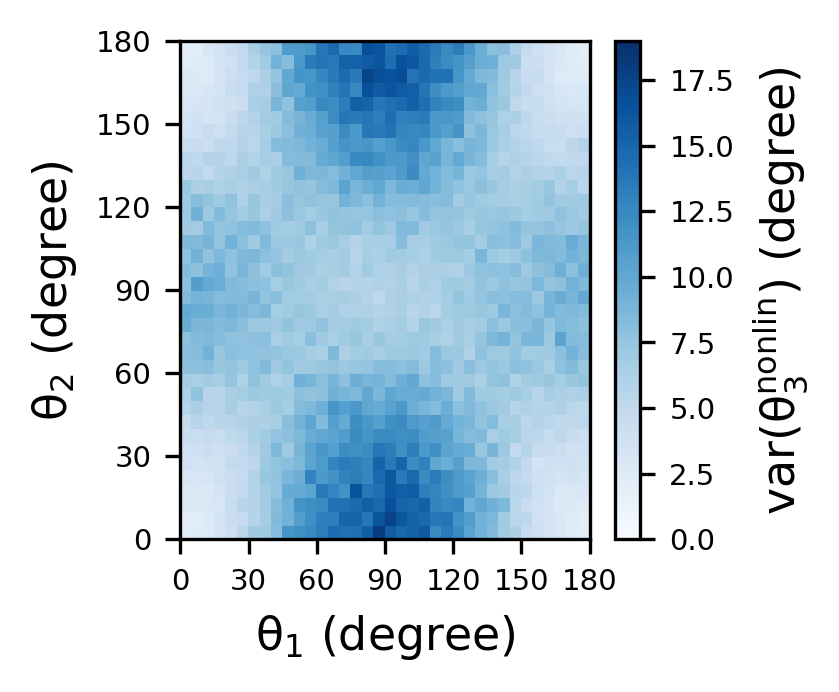

In [17]:




steps = 37
heatmap_y = torch.linspace(0,180,steps)


font_size_22_ = 11

font_size_tick = 7

y, x = np.meshgrid(  heatmap_y  , heatmap_y   )





z = torch.div( heatmap_tensor_mean_nonlin  ,  heatmap_tensor_count_nonlin   )  


z_min, z_max = 0, 180

fig = plt.figure( num = None, figsize=( 2.2 , 2.2 ), dpi=300, facecolor='w', edgecolor='k'  )

im = plt.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)

plt.axis([0,180 , 0 , 180 ])

plt.xticks(range(0,181,30))

plt.yticks(range(0,181,30))


plt.clim(0,180)

plt.xlabel(r"$\theta_1 \ (degree)$"  , fontsize= font_size_22_  )
plt.ylabel(r"$\theta_2 \ (degree)$"  , fontsize= font_size_22_  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

cbar = fig.colorbar(im  , ax=plt.gca() , ticks=range(0,181,30)  )
cbar.ax.tick_params(labelsize=font_size_tick) 

cbar.set_label( label=r"$mean(\theta^{nonlin}_3) \ (degree)$" , size= font_size_22_  )

str_dir = base_directory_figure_str + "/heat_map_mean_uniform_sphere_non_lin.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()

########################### var ########################

y, x = np.meshgrid(  heatmap_y  , heatmap_y   )




z_mean = torch.div( heatmap_tensor_mean_nonlin  ,  heatmap_tensor_count_nonlin   )  
z = torch.div( heatmap_tensor_var_nonlin    ,  heatmap_tensor_count_nonlin   )  - torch.mul( z_mean , z_mean )


z_min, z_max = z.min() , z .max()

plt.figure( num = None, figsize=(2.2 , 2.2 ), dpi=300, facecolor='w', edgecolor='k'  )

im = plt.pcolormesh(x, y, z, cmap='Blues', vmin=z_min, vmax=z_max)

plt.axis([0,180 , 0 , 180 ])

plt.xticks(range(0,181,30))

plt.yticks(range(0,181,30))



plt.clim(0, z_max.floor().item() + 1 )

plt.xlabel(r"$\theta_1 \ (degree)$"  , fontsize= font_size_22_  )
plt.ylabel(r"$\theta_2 \ (degree)$"  , fontsize= font_size_22_  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

cbar = fig.colorbar(im  , ax=plt.gca()  )
cbar.ax.tick_params(labelsize=font_size_tick) 

cbar.set_label( label=r"$var(\theta^{nonlin}_3) \ (degree)$" , size= font_size_22_  )

str_dir = base_directory_figure_str + "/heat_map_var_uniform_sphere_non_lin.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()



# Run histograms

In [9]:


N_iter = 1000000


size1 = 30
size2 =  15
size3 = 40





diff_min_list_high10 = []
diff_max_list_high10 = []
diff_nonlin_lin_list_high10 = []


diff_min_list_high20 = []
diff_max_list_high20 = []
diff_nonlin_lin_list_high20 = []


diff_min_list_high30 = []
diff_max_list_high30 = []
diff_nonlin_lin_list_high30 = []


diff_min_list_high40 = []
diff_max_list_high40 = []
diff_nonlin_lin_list_high40 = []


diff_min_list_high50 = []
diff_max_list_high50 = []
diff_nonlin_lin_list_high50 = []


diff_min_list_high60 = []
diff_max_list_high60 = []
diff_nonlin_lin_list_high60 = []


diff_min_list_high70 = []
diff_max_list_high70 = []
diff_nonlin_lin_list_high70 = []


diff_min_list_high80 = []
diff_max_list_high80 = []
diff_nonlin_lin_list_high80 = []


diff_min_list_high5_only_one= []
diff_max_list_high5_only_one = []
diff_nonlin_lin_high5_only_one = []


diff_min_list_high85_only_one = []
diff_max_list_high85_only_one = []
diff_nonlin_lin_high85_only_one = []


def derivative_activation1(x):
 
  return ( x >= 0  ) * 1

for i in range(N_iter):
  if i % 100000 == 0 :
    print(i)

  A , C = generate_two_matrices_1(size1,size2)


  B , D = generate_two_matrices_1(size2,size3)

  Z1 = derivative_activation1 (torch.randn([size1,size2]))

  Z2 = derivative_activation1( torch.randn([size1,size3]) )



  teta1 =   my_weight.angle( A , C ) 


  teta1_abs  =  90 -  np.abs(  my_weight.angle( A , C )  -  90   )

  teta2 =   my_weight.angle( B , D ) 



  teta2_abs =   90 - np.abs( my_weight.angle( B , D )  -  90 )

  E = torch.matmul(  A , B  )

  F = torch.matmul(  C , D  )


  E_non_lin = torch.mul(torch.matmul(  torch.mul(A,Z1) , B  ),Z2)

  F_non_lin = torch.mul(torch.matmul(  torch.mul(C,Z1)  , D  ),Z2)


  teta3 =   my_weight.angle( E , F )  

  teta3_nonlin =   my_weight.angle( E_non_lin , F_non_lin )  




  min_teta = torch.min( torch.tensor(  [teta1  , teta2 ]  ))



  max_teta = torch.max( torch.tensor(  [teta1  , teta2 ]  ))





  min_teta_abs = torch.min( torch.tensor(  [teta1_abs  , teta2_abs ]  ))



  max_teta_abs = torch.max( torch.tensor(  [teta1_abs  , teta2_abs ]  ))



  if  teta1 > 80 and teta2 > 80 and teta1 < 90 and teta2 < 90:
    diff_min_list_high80 .append( teta3-min_teta_abs )
    diff_max_list_high80 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high80.append(teta3 - teta3_nonlin)

  if  teta1 > 70 and teta2 > 70 and teta1 < 90 and teta2 < 90 and (teta1 < 80 or teta2 < 80):
    diff_min_list_high70 .append( teta3-min_teta_abs )
    diff_max_list_high70 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high70.append(teta3 - teta3_nonlin)

  if  teta1 > 60 and teta2 > 60 and teta1 < 90 and teta2 < 90 and (teta1 < 70 or teta2 < 70):
    diff_min_list_high60 .append( teta3-min_teta_abs )
    diff_max_list_high60 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high60.append(teta3 - teta3_nonlin)





  if  teta1 < 10 and teta2 < 10 :
    diff_min_list_high10 .append( teta3-min_teta_abs )
    diff_max_list_high10 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high10.append(teta3 - teta3_nonlin)


  if  teta1 < 20 and teta2 < 20 and (teta1 > 10 or teta2 > 10)  :
    diff_min_list_high20 .append( teta3-min_teta_abs )
    diff_max_list_high20 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high20.append(teta3 - teta3_nonlin)


  if  teta1 < 30 and teta2 < 30 and (teta1 > 20 or teta2 > 20 )  :
    diff_min_list_high30 .append( teta3-min_teta_abs )
    diff_max_list_high30 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high30.append(teta3 - teta3_nonlin)

  if  teta1 < 40 and teta2 < 40 and (teta1 > 30 or teta2 > 30 )  :
    diff_min_list_high40 .append( teta3-min_teta_abs )
    diff_max_list_high40 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high40.append(teta3 - teta3_nonlin)


  if  teta1 < 50 and teta2 < 50 and (teta1 > 40 or teta2 > 40 )  :
    diff_min_list_high50 .append( teta3-min_teta_abs )
    diff_max_list_high50 .append( teta3-max_teta_abs )
    diff_nonlin_lin_list_high50.append(teta3 - teta3_nonlin)



  # if  teta1 < 5 or teta2 < 5 or teta1 > 175 or teta2 > 175: 
  if  teta1 < 5 or teta2 < 5 : 



    diff_min_list_high5_only_one .append(teta3-min_teta_abs )
    diff_max_list_high5_only_one .append(teta3-max_teta_abs )
    diff_nonlin_lin_high5_only_one.append(teta3 - teta3_nonlin)

  # if  (teta1 > 85 and teta1 < 95 ) or (teta2 > 85 and teta2 < 95 ) : 
  if  (teta1 > 85 ) or (teta2 > 85 ) : 


    diff_min_list_high85_only_one .append(teta3-min_teta_abs )
    diff_max_list_high85_only_one .append(teta3-max_teta_abs )
    diff_nonlin_lin_high85_only_one.append(teta3 - teta3_nonlin)







str_dir =  base_directory_data_str + "/diff_min_list_high10.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high10  , fp)

str_dir =  base_directory_data_str + "/diff_min_list_high20.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high20  , fp)

str_dir =  base_directory_data_str + "/diff_min_list_high30.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high30  , fp)


str_dir =  base_directory_data_str + "/diff_min_list_high40.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high40  , fp)


str_dir =  base_directory_data_str + "/diff_min_list_high50.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high50  , fp)

str_dir =  base_directory_data_str + "/diff_min_list_high60.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high60  , fp)

str_dir =  base_directory_data_str + "/diff_min_list_high70.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high70  , fp)      


str_dir =  base_directory_data_str + "/diff_min_list_high80.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high80  , fp)   








str_dir =  base_directory_data_str + "/diff_max_list_high10.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high10  , fp)

str_dir =  base_directory_data_str + "/diff_max_list_high20.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high20  , fp)

str_dir =  base_directory_data_str + "/diff_max_list_high30.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high30  , fp)


str_dir =  base_directory_data_str + "/diff_max_list_high40.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high40  , fp)


str_dir =  base_directory_data_str + "/diff_max_list_high50.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high50  , fp)

str_dir =  base_directory_data_str + "/diff_max_list_high60.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high60  , fp)

str_dir =  base_directory_data_str + "/diff_max_list_high70.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high70  , fp)      


str_dir =  base_directory_data_str + "/diff_max_list_high80.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high80  , fp)   



str_dir =  base_directory_data_str + "/diff_min_list_high5_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high5_only_one  , fp)   

str_dir =  base_directory_data_str + "/diff_max_list_high5_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high5_only_one  , fp)   



str_dir =  base_directory_data_str + "/diff_min_list_high85_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_min_list_high85_only_one  , fp)   


str_dir =  base_directory_data_str + "/diff_max_list_high85_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_max_list_high85_only_one  , fp)   

str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high10.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_nonlin_lin_list_high10  , fp)   




str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high20.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_nonlin_lin_list_high20  , fp)   


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high30.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_nonlin_lin_list_high30  , fp)   

str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high40.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump( diff_nonlin_lin_list_high40  , fp)   


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high50.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_list_high50  , fp)   


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high60.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_list_high60  , fp)   


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high70.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_list_high70  , fp)   


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high80.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_list_high80  , fp)   



str_dir =  base_directory_data_str + "/diff_nonlin_lin_high5_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_high5_only_one  , fp)   

str_dir =  base_directory_data_str + "/diff_nonlin_lin_high85_only_one.txt"
with open(str_dir , "wb") as fp:   #Pickling
  pickle.dump(  diff_nonlin_lin_high85_only_one  , fp)   




0
100000
200000
300000
400000
500000
600000
700000
800000
900000


# Plot histograms

In [10]:

str_dir =  base_directory_data_str + "/diff_min_list_high10.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high10 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_min_list_high20.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high20 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_min_list_high30.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high30 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_min_list_high40.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high40 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_min_list_high50.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high50 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_min_list_high60.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high60 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_min_list_high70.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high70 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_min_list_high80.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high80 = pickle.load(fp)



str_dir =  base_directory_data_str + "/diff_min_list_high5_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high5_only_one = pickle.load(fp)




str_dir =  base_directory_data_str + "/diff_min_list_high85_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_min_list_high85_only_one = pickle.load(fp)




str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high10.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high10 = pickle.load(fp)




str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high20.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high20 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high30.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high30 = pickle.load(fp)



str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high40.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high40 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high50.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high50 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high60.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high60 = pickle.load(fp)




str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high70.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high70 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_nonlin_lin_list_high80.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_list_high80 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_nonlin_lin_high5_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_high5_only_one = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_nonlin_lin_high85_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_nonlin_lin_high85_only_one = pickle.load(fp)



str_dir =  base_directory_data_str + "/diff_max_list_high10.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high10 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high20.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high20 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high30.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high30 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high40.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high40 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high50.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high50 = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high60.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high60 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_max_list_high70.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high70 = pickle.load(fp)


str_dir =  base_directory_data_str + "/diff_max_list_high80.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high80 = pickle.load(fp)



str_dir =  base_directory_data_str + "/diff_max_list_high5_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high5_only_one = pickle.load(fp)

str_dir =  base_directory_data_str + "/diff_max_list_high85_only_one.txt"
with open( str_dir  , "rb") as fp:   #Pickling
  diff_max_list_high85_only_one = pickle.load(fp)    

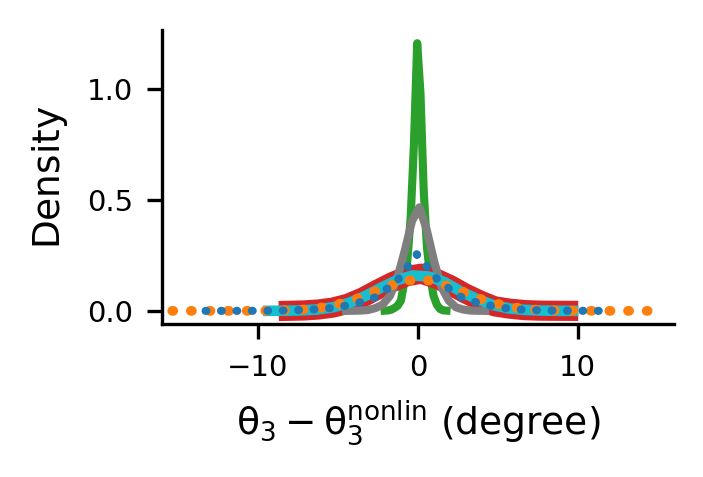

In [11]:




font_size_22_ = 9

font_size_tick = 7



my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

linewidth_ = 1.95

plt.figure( num = None, figsize=( 2.2 , 1.3 ), dpi=300, facecolor='w', edgecolor='k'  )


#################################
y,x = np.histogram( diff_nonlin_lin_high5_only_one , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )
  
jj = 0
plt.plot(xx,y ,linestyle = (0,(0.1,1.8)) ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_ ,zorder = 10 )

#################################
y,x = np.histogram(diff_nonlin_lin_high85_only_one   , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
xx = np.array(xx) 
plt.plot(xx + 0.05 ,y , linestyle = (0,(0.1,1.8))  ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_+0.4 ,zorder = 9 )


#################################



y,x = np.histogram(diff_nonlin_lin_list_high10 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_)

#################################
y,x = np.histogram(diff_nonlin_lin_list_high80 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ + 2.9 )


#################################
y,x = np.histogram(diff_nonlin_lin_list_high20 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ )

#################################
y,x = np.histogram(diff_nonlin_lin_list_high70 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ + 0.6 )





plt.ylabel(r"$Density$"  , fontsize= font_size_22_  )
plt.xlabel(r"$ \theta_3 - \theta^{nonlin}_3 \ (degree)$"  , fontsize= font_size_22_  )

plt.xlim(-16,16)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

str_dir = base_directory_figure_str + "/hist_lin_non_lin.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()



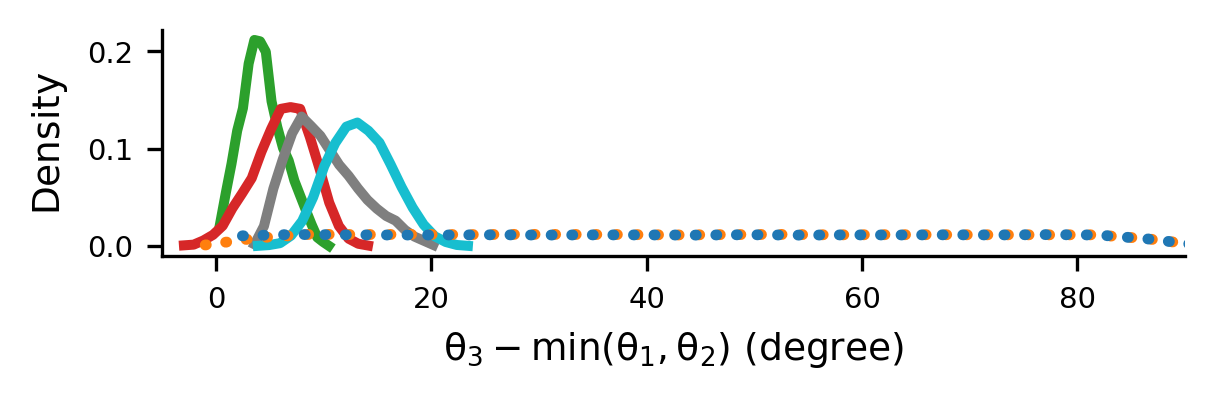

In [23]:




font_size_22_ = 9

font_size_tick = 7





linewidth_ = 2.4

plt.figure( num = None, figsize=( 4.4 , 1 ), dpi=300, facecolor='w', edgecolor='k'  )


#################################
y,x = np.histogram( diff_min_list_high5_only_one   , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )
  
jj = 0
plt.plot(xx,y ,linestyle = (0,(0.1,1.8)) ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_+0.2 ,zorder = 10 )

#################################
y,x = np.histogram( diff_min_list_high85_only_one , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
xx = np.array(xx) 
plt.plot(xx,y , linestyle = (0,(0.1,1.8))  ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_+0.2 ,zorder = 9 )


#################################



y,x = np.histogram(diff_min_list_high10 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_)

#################################
y,x = np.histogram(diff_min_list_high80 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ )


#################################
y,x = np.histogram(diff_min_list_high20 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ )

#################################
y,x = np.histogram(diff_min_list_high70 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ )





plt.ylabel(r"$Density$"  , fontsize= font_size_22_  )
plt.xlabel(r"$\theta_3-min(\theta_1,\theta_2) \ (degree)$"  , fontsize= font_size_22_  )

plt.xlim(-5,90)
plt.xticks(range(0,91,20))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

str_dir = base_directory_figure_str + "/hist_min.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()



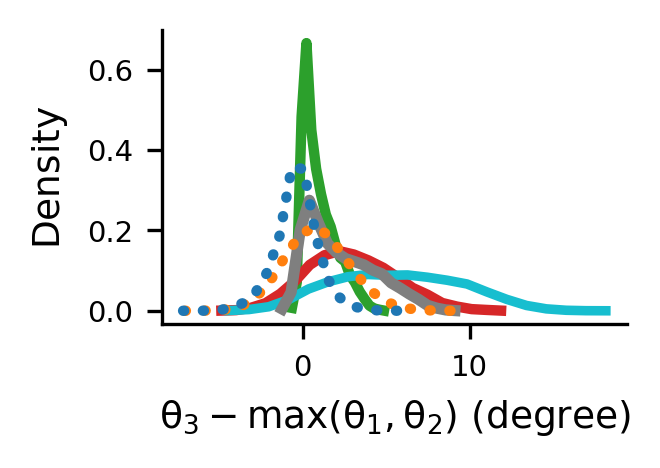

In [13]:



font_size_22_ = 9

font_size_tick = 7





linewidth_ = 2.3

#################################
plt.figure( num = None, figsize=( 2 , 1.3 ), dpi=300, facecolor='w', edgecolor='k'  )


#################################
y,x = np.histogram(diff_max_list_high5_only_one , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = 0
xx = np.array(xx)-0.5
plt.plot(xx,y , linestyle = (0,(0.1,1.8)) ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_+0.2 ,zorder = 10)

#################################
y,x = np.histogram(diff_max_list_high85_only_one , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y ,linestyle = (0,(0.1,1.8)) ,dash_capstyle = 'round', color = my_cycle[jj] , linewidth= linewidth_+0.2 ,zorder = 8)

##########################################################
y,x = np.histogram(diff_max_list_high10 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ + 0.2 )

#################################
y,x = np.histogram(diff_max_list_high80 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ + 0.2)

#################################
y,x = np.histogram(diff_max_list_high20 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_+0.4  ,zorder = 7 )

#################################
y,x = np.histogram(diff_max_list_high70 , bins=20 , density=True)
xx = []

for i in range(len(x)-1):
  xx.append(  (x[i]+x[i+1])/2  )

jj = jj+1
plt.plot(xx,y , color = my_cycle[jj] , linewidth= linewidth_ )



plt.ylabel(r"$Density$"  , fontsize= font_size_22_  )
plt.xlabel(r"$\theta_3-min(\theta_1,\theta_2) \ (degree)$"  , fontsize= font_size_22_  )

# plt.xlim(-5,90)
# plt.xticks(range(0,91,20))



plt.ylabel(r"$Density$"  , fontsize= font_size_22_  )
plt.xlabel(r"$\theta_3-max(\theta_1,\theta_2) \ (degree)$"  , fontsize= font_size_22_  )

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)

str_dir = base_directory_figure_str + "/hist_max.jpg"
plt.savefig( str_dir 
            , dpi=300 , bbox_inches='tight' ) 

plt.show()



# Plot legend

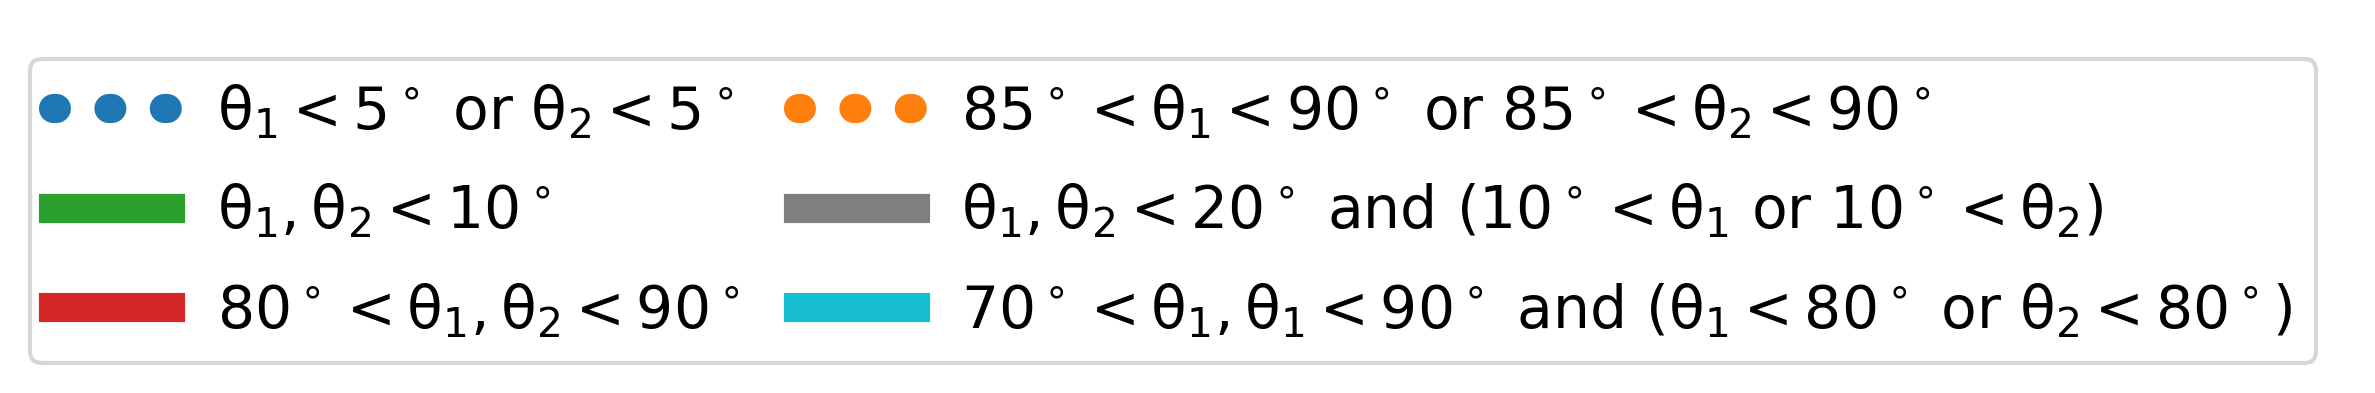

In [14]:



font_size_22_ = 9

font_size_tick = 7




plt.figure( num = None, figsize=( 2 , 1.3 ), dpi=300, facecolor='w', edgecolor='k'  )


linewidth_ = 1.3

jj=0

#################################


plt.plot([0]  , linestyle = (0,(0.1,1.8)) ,dash_capstyle = 'round' 
         , label = r"$\theta_1<5^\circ\ or\ \theta_2<5^\circ $", color = my_cycle[0] , linewidth= linewidth_+0.2 ,zorder = 10 )

#################################





plt.plot([0]  , color = my_cycle[2] , linewidth= linewidth_ , label = r"$\theta_1,\theta_2<10^\circ$" )

#################################


plt.plot([0] , color = my_cycle[3] , linewidth= linewidth_  , label = r"$80^\circ<\theta_1,\theta_2<90^\circ$"  )

#################################

plt.plot([0]  ,linestyle = (0,(0.1,1.8)), label = r"$85^\circ<\theta_1<90^\circ\ or\ 85^\circ<\theta_2<90^\circ $"
 ,dash_capstyle = 'round', color = my_cycle[1] , linewidth= linewidth_+0.2 ,zorder = 8)

##########################################################

plt.plot([0]  , color = my_cycle[4] , linewidth= linewidth_  , label = r"$\theta_1,\theta_2<20^\circ  \ and \ (10^\circ<\theta_1 \ or \ 10^\circ<\theta_2)$" )

#################################


plt.plot([0] , color = my_cycle[5] , linewidth= linewidth_ , label = r"$70^\circ<\theta_1,\theta_1<90^\circ \ and \ (\theta_1<80^\circ \ or \ \theta_2<80^\circ)$")







ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=font_size_tick)
ax.tick_params(axis='y', labelsize=font_size_tick)



leg =  plt.legend( fontsize = 14  , markerscale=10  , labelspacing = 0.7 , columnspacing = 1 , ncol=2   )

for line in leg.get_lines():
    line.set_linewidth(7.0)

plt.axis('off')


def export_legend(legend, filename  , expand=[-2,-2,2,2]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


str_dir = base_directory_figure_str + "/legend.jpg"

export_legend( leg  , filename = str_dir  )


plt.show()

